In [1]:
import torch
from repop import dataset,params2theta,theta2params
from matplotlib import pyplot as plt
import pandas as pd

import numpy as np
np.random.seed(42)

In [2]:
threshold = 300
df = pd.read_csv('real_data/OD_exp.csv',header=None, names=['OD_dil','20','200','2000'])
df['OD_dil'] = df['OD_dil'].fillna(method='ffill')
OD_label = [    float(i.split('"')[1])  for i in df['OD_dil'] ]

df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(np.inf)
df.iloc[:,3] = pd.to_numeric(df.iloc[:,3], errors='coerce').fillna(0)

ks = df.to_numpy()[:,1:4]
dil_schedule = np.array((20,200,2000))#/.9



/tmp/ipykernel_14407/105950166.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
/tmp/ipykernel_14407/105950166.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(np.inf)
/tmp/ipykernel_14407/105950166.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.co

In [3]:
cts,dils =[],[]
for k_line in ks:
    index = np.argmax(k_line <= threshold) if np.any(ks <= threshold) else len(ks) - 1
    cts.append( k_line[index] )
    dils.append( dil_schedule[index] )
    #print('Day ')

cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)

In [4]:
od = np.array([float(d.split('"')[1]) for d in df['OD_dil']])

In [5]:
data =  dataset(cts[od!=1],dils[od!=1],threshold)

In [6]:
data.evaluate(components=int(np.sqrt(data.counts.numel())))

9
10.1210205789139 -619.5353405593786 -360.8269747492793
9.34435492308505 -617.7930665979106 -287.93267211684156
8.75511927709365 -618.0296221702083 -230.53768852387714
8.317278024362873 -617.7164694260105 -188.01126227848283
7.965844864421034 -618.0806316144798 -154.2940264679694
7.743709188595057 -618.7452998909448 -132.21368837846057
7.558330012612319 -618.5617444383076 -114.42838415735976
7.411255630828838 -618.5778621636689 -100.17803539020532
7.306154852649273 -619.0128155617524 -89.58772990225809
7.211647203360414 -618.7341376389084 -80.71206842336655
7.137293664732282 -618.3315249023948 -73.92663855185936
7.089321427873962 -618.3682170346812 -69.26089809585334
7.059897843247261 -618.5831355372452 -66.20394866091603
7.040174814674105 -618.7223258496965 -64.15889138811097
7.02651113707746 -618.7812359113022 -62.77929563476689
7.016805048671405 -618.783885924254 -61.838239815764844
7.009713637965766 -618.7483463903009 -61.18797183097879
7.00440003756657 -618.6939598356428 -60.7283

(tensor([5.7295e+03, 2.9928e+04, 2.5169e+03, 4.3175e+03, 9.9777e+03, 1.3742e+03,
         9.3894e+02, 1.9106e+02, 1.2037e+00], device='cuda:0',
        dtype=torch.float64),
 tensor([9.6912e+02, 4.6456e+03, 4.8185e+02, 1.3899e+03, 3.9454e+03, 3.4823e+02,
         3.3832e+02, 5.4552e+01, 5.7929e-01], device='cuda:0',
        dtype=torch.float64),
 tensor([0.2388, 0.2074, 0.1502, 0.1328, 0.1111, 0.0795, 0.0516, 0.0193, 0.0093],
        device='cuda:0', dtype=torch.float64))

k tensor([14])
fk tensor([1])
k tensor([ 10,  14,  17,  18,  22,  23,  26,  28,  31,  32,  38,  39,  41,  43,
         48,  58,  66,  67,  71,  84, 104, 115, 120, 122, 125, 139, 142, 144,
        146, 150, 156, 158, 161, 162, 163, 165, 167, 171, 179, 217])
fk tensor([1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
k tensor([ 11,  23,  38,  47,  50,  52,  55,  64,  68,  70,  80,  81,  85,  89,
         90, 100, 110, 121, 122, 126, 131, 132, 135, 136, 137, 146, 152, 159,
        175, 183, 215, 217, 222, 223, 225, 227, 230, 240, 241, 247, 248, 252,
        264, 275, 283, 296])
fk tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])


/home/pessoa/Codes/CElegans-Plate/repop.py:324: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks() * bins[-1]).astype(int))


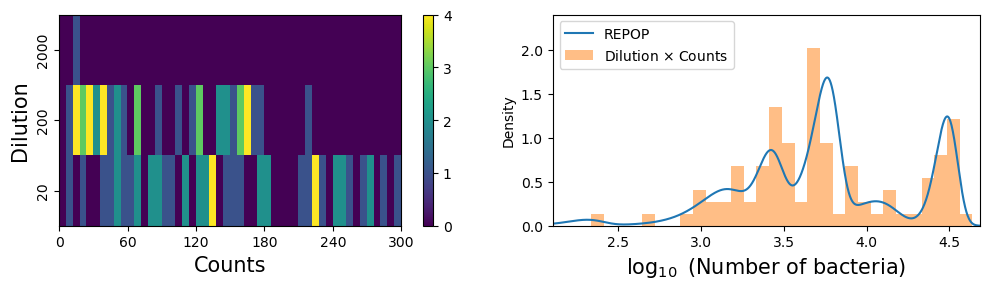

In [7]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
data.dil_imshow(ax[0],fig)
data.log_plots(ax[1])
plt.tight_layout()
ax[1].legend()
xlim = ax[1].get_xlim()
ax[1].set_ylim(0,2.4)

plt.savefig('graphs/3dils.png',dpi=500)

In [8]:
del data.lpkdil_n
#del data

In [9]:
from synth_data import cases

#make a case with the 3 higher probability peaks
m,s,r = [d[:4].cpu() for d in data.ev]
r=r/r.sum()
cs = cases.case(m.numpy(),s.numpy(),r.numpy(),'Case redone')

In [10]:
cts,dils = cs.sample_data(size=800)

In [13]:
data_synth =  dataset(cts,dils,threshold=300)
data_synth.evaluate()

25
6.1785269468098525 -4678.61372916535 -263.2985742750187
6.1056202993790425 -4676.875208929485 -207.28207156678718


k tensor([ 18,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
         33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  46,  47,  49,
         50,  53,  85,  92,  95, 100, 108, 111, 113, 114, 115, 116, 117, 119,
        120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 132, 133, 135, 136,
        137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 188, 190, 191, 192, 194, 195, 197, 199,
        206, 207, 208, 211, 215])
fk tensor([ 1,  1,  3,  1,  2,  1,  4,  1,  8,  5,  7,  9,  5,  3,  6,  5,  8,  2,
        12,  8,  6,  3,  5,  2,  2,  4,  1,  1,  2,  1,  1,  1,  1,  1,  1,  3,
         2,  1,  2,  3,  1,  3,  3,  1,  2,  2,  1,  3,  1,  2,  2,  5,  5,  2,
         3, 11,  3,  3,  3,  1,  4,  4,  5,  5,  1,  5,  4,  1,  5,  3,  1,  1,
         2,  3,  

IndexError: index 206 is out of bounds for dimension 0 with size 201

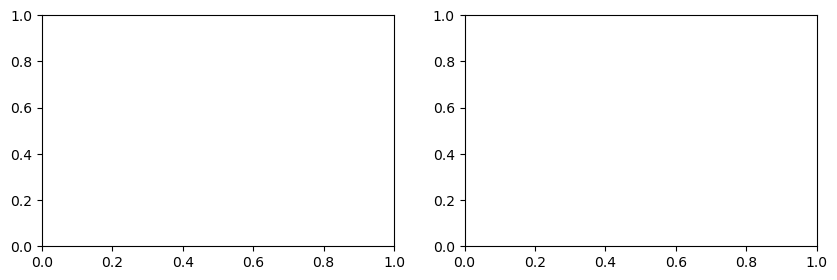

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
data_synth.dil_imshow(ax[0],fig)
data_synth.log_plots(ax[1],params2theta(m,s,r))

ax[1].set_xlim(xlim)
plt.tight_layout()
ax[1].legend()
ax[1].set_ylim(0,2.4)

plt.savefig('graphs/3dils_synth.png',dpi=500)

In [ ]:
data.ev

(tensor([5.7295e+03, 2.9928e+04, 2.5169e+03, 4.3175e+03, 9.9777e+03, 1.3742e+03,
         9.3894e+02, 1.9106e+02, 1.2037e+00], device='cuda:0',
        dtype=torch.float64),
 tensor([9.6912e+02, 4.6456e+03, 4.8185e+02, 1.3899e+03, 3.9454e+03, 3.4823e+02,
         3.3832e+02, 5.4552e+01, 5.7929e-01], device='cuda:0',
        dtype=torch.float64),
 tensor([0.2388, 0.2074, 0.1502, 0.1328, 0.1111, 0.0795, 0.0516, 0.0193, 0.0093],
        device='cuda:0', dtype=torch.float64))